In [4]:
import pandas as pd
import numpy as np 
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from scipy.stats import chi2_contingency
from sklearn.manifold import TSNE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score, confusion_matrix
from __future__ import print_function
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

## Import data

In [5]:
mytrain= pd.read_csv( 'german-train-cate.csv')
mytest =  pd.read_csv( 'German_Credit_TEST.csv')


In [6]:
mytrain_sub= pd.read_csv( 'german-train.csv')

In [7]:
mytrain_sub.head()

,ID,Duration of Credit (month),Credit Amount,Guarantors,Age (years),No of Credits at this Bank,No of dependents,Telephone,Foreign Worker,Creditability,...,Occupation_unskilled,AgeGroup_Youth,AgeGroup_Adult,AgeGroup_Old.Adult,Duration of credit_within 1 year,Duration of credit_within 2 year,Duration of credit_more than 2 year,Credit Amount Group_less than 2k,Credit Amount Group_middle,Credit Amount Group_more than 10k
0,151,48,3051,0,54,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
1,152,21,571,0,65,2,0,0,1,1,...,0,0,0,1,0,1,0,1,0,0
2,153,18,1345,0,26,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,154,15,806,0,22,1,0,0,1,1,...,1,1,0,0,0,1,0,1,0,0
4,155,4,1494,0,29,1,1,0,0,1,...,1,0,1,0,1,0,0,1,0,0


# Data explortary 
Plot the data to see the relationshop between crediability and other variables  

### Creditability

<AxesSubplot:xlabel='Payment Status of Previous Credit', ylabel='count'>

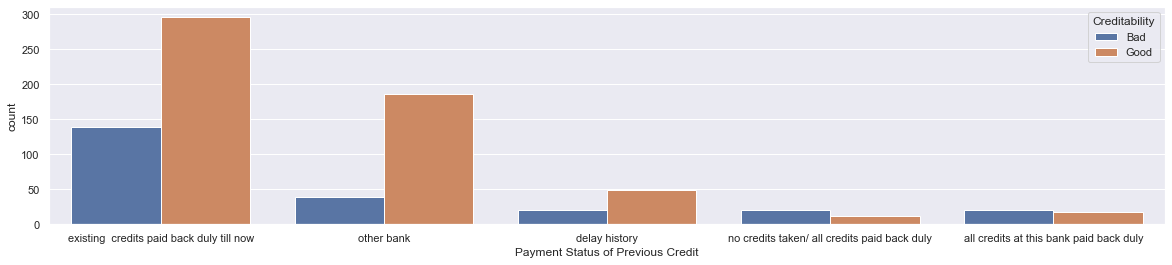

In [8]:
plt.figure(figsize=(20,4)) 
sns.countplot(x='Payment Status of Previous Credit',hue='Creditability',data=mytrain)

### Age


<AxesSubplot:xlabel='Age (years)', ylabel='count'>

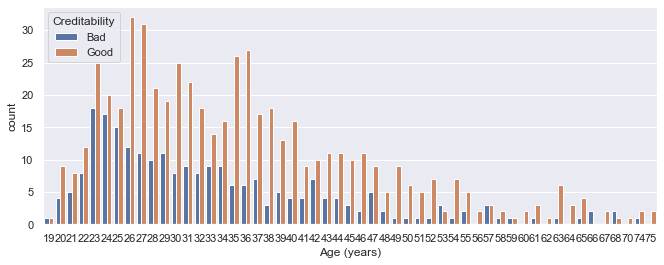

In [9]:
plt.figure(figsize=(11,4)) 
sns.countplot(x='Age (years)',hue ='Creditability',data=mytrain)

### Credit Amount

<AxesSubplot:xlabel='Credit Amount', ylabel='Duration of Credit (month)'>

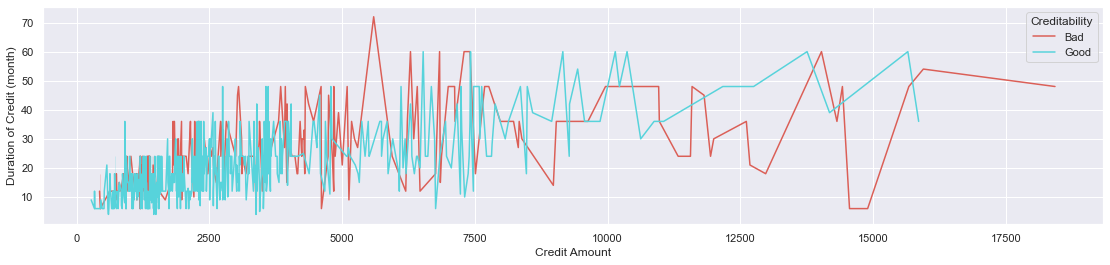

In [10]:
plt.figure(figsize=(19,4)) 
sns.lineplot(x="Credit Amount",y="Duration of Credit (month)",hue="Creditability",palette=sns.color_palette("hls", 2),data=mytrain)

### Acount Balance

<AxesSubplot:xlabel='Account Balance', ylabel='count'>

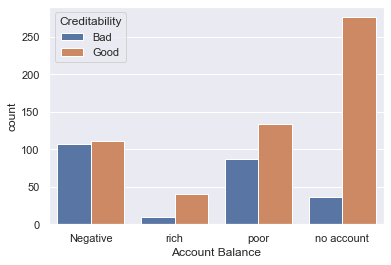

In [11]:
sns.countplot(x='Account Balance',hue ='Creditability',data=mytrain)
# no account people got creditability the most

### Purpose

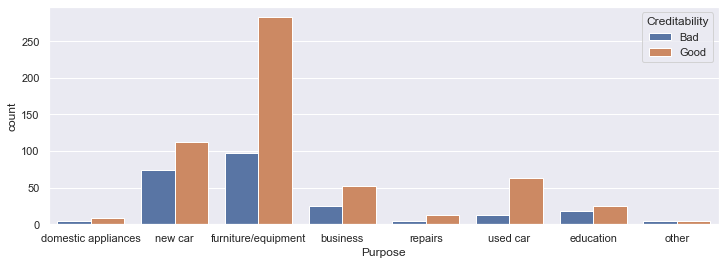

In [12]:
plt.figure(figsize=(12,4)) 
sns.countplot(x="Purpose",hue='Creditability', data=mytrain)
plt.show()
# used car could have higher chance to get money.
# furniture/ equipment is a popular reason to apply credit 

### Type of apartment

<AxesSubplot:xlabel='Type of apartment', ylabel='count'>

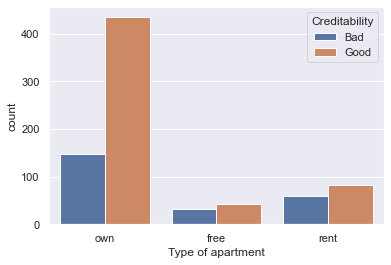

In [13]:
sns.countplot(x="Type of apartment",hue='Creditability', data=mytrain)

### Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

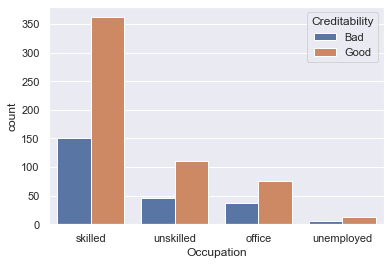

In [14]:
sns.countplot(x="Occupation",hue='Creditability', data=mytrain)
# skilled could get approval more

### Value Saving/ Stocks

<AxesSubplot:xlabel='Value Savings/Stocks', ylabel='count'>

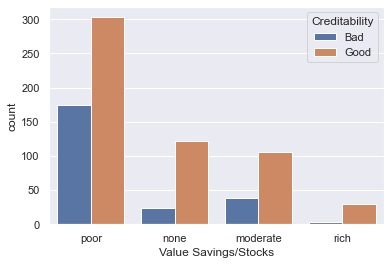

In [15]:
sns.countplot(x="Value Savings/Stocks",hue='Creditability', data=mytrain)
# seems like it does not matter how many saving 

### Payment Status of Previous Credit

<AxesSubplot:xlabel='Payment Status of Previous Credit', ylabel='count'>

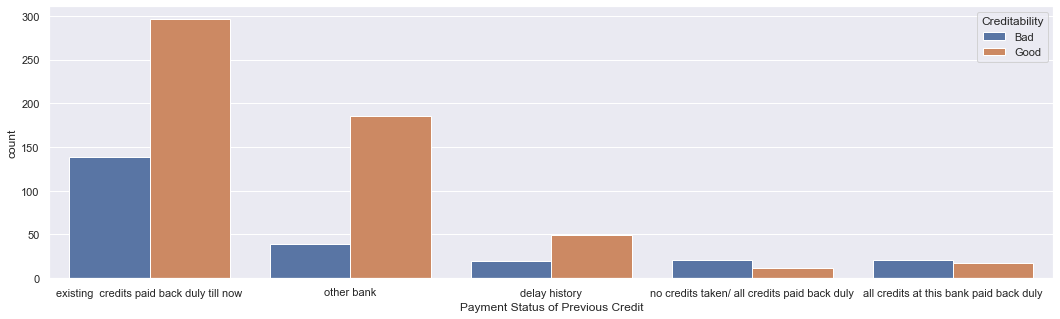

In [16]:
plt.figure(figsize=(18,5))
sns.countplot(x="Payment Status of Previous Credit",hue='Creditability', data=mytrain)

### Length of current employment

<AxesSubplot:xlabel='Length of current employment', ylabel='count'>

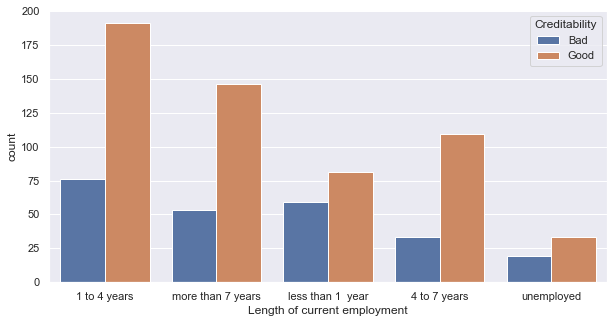

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x="Length of current employment",hue='Creditability', data=mytrain)

### Duration of Credit

<AxesSubplot:xlabel='Duration of Credit (month)', ylabel='count'>

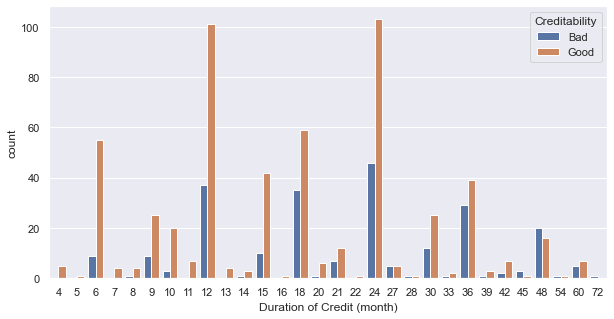

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x="Duration of Credit (month)",hue='Creditability', data=mytrain)
# lower duration could probably approve creditability 

### Instalment per cent

<AxesSubplot:xlabel='Instalment per cent', ylabel='count'>

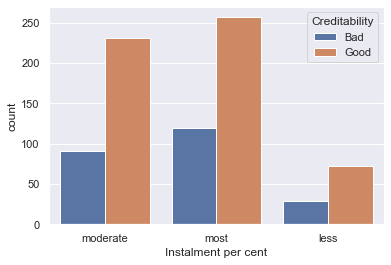

In [19]:

sns.countplot(x="Instalment per cent",hue='Creditability', data=mytrain)

### Concurrent Credits

<AxesSubplot:xlabel='Concurrent Credits', ylabel='count'>

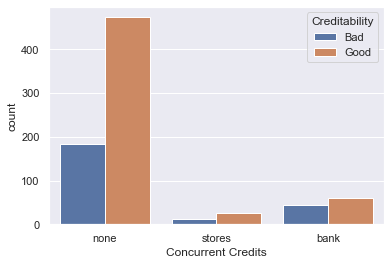

In [20]:

sns.countplot(x="Concurrent Credits",hue='Creditability', data=mytrain)

### Most valuable available asset

<AxesSubplot:xlabel='Most valuable available asset', ylabel='count'>

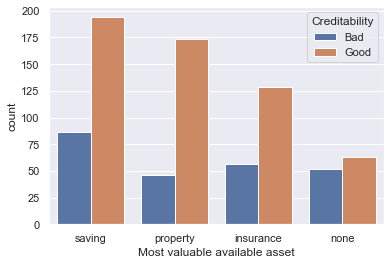

In [21]:
sns.countplot(x="Most valuable available asset",hue='Creditability', data=mytrain)

## Creating groups for Age, Credit Amount and Duration of Credit

In [22]:
#making age group 19-25, 26-36, 37 up
bins= [19,25,36,75]
labels = ['Youth','Adult','Old.Adult']
mytrain['AgeGroup'] = pd.cut(mytrain['Age (years)'], bins=bins, labels=labels, right=False)
mytest['AgeGroup'] = pd.cut(mytest['Age (years)'], bins=bins, labels=labels, right=False)

# duration of credit group in train data
# less than 1 yr, 1-2 yr, more than 2 yr 
bins= [4,12,24,72]
labels = ['within 1 year','within 2 year','more than 2 year']
mytrain['Duration of credit'] = pd.cut(mytrain['Duration of Credit (month)'], bins=bins, labels=labels, right=False)
mytest['Duration of credit'] = pd.cut(mytest['Duration of Credit (month)'], bins=bins, labels=labels, right=False)

# credit amount group 
bins= [276,1995,9960,18424]
labels = ['less than 2k','middle','more than 10k']
mytrain['Credit Amount Group'] = pd.cut(mytrain['Credit Amount'], bins=bins, labels=labels, right=False)
mytest['Credit Amount Group'] = pd.cut(mytest['Credit Amount'], bins=bins, labels=labels, right=False)



### Age Groups

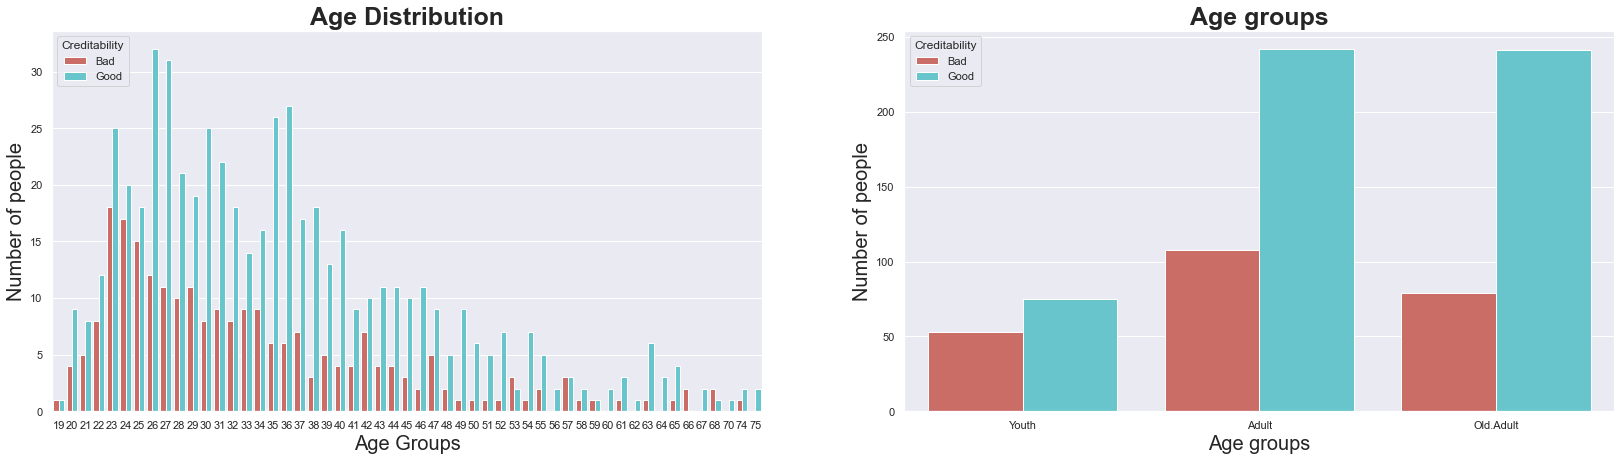

In [23]:
plt.figure(figsize=(28,7))
ax1 = plt.subplot(1, 2, 1)
bar = sns.countplot(
    x="Age (years)",
    hue="Creditability",
palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax1
)
bar.set_title('Age Distribution',fontdict= { 'fontsize': 25, 'fontweight':'bold'})
bar.set_xlabel('Age Groups', fontsize = 20)
bar.set_ylabel('Number of people', fontsize = 20)
ax2 = plt.subplot(1, 2, 2)
bar2= sns.countplot(
    x="AgeGroup",
    hue="Creditability",
    palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax2
)
bar2.set_title('Age groups',fontdict= { 'fontsize': 25, 'fontweight':'bold'})
bar2.set_xlabel('Age groups', fontsize = 20)
bar2.set_ylabel('Number of people', fontsize = 20)
plt.savefig("picture3.png")

### Credit Amount

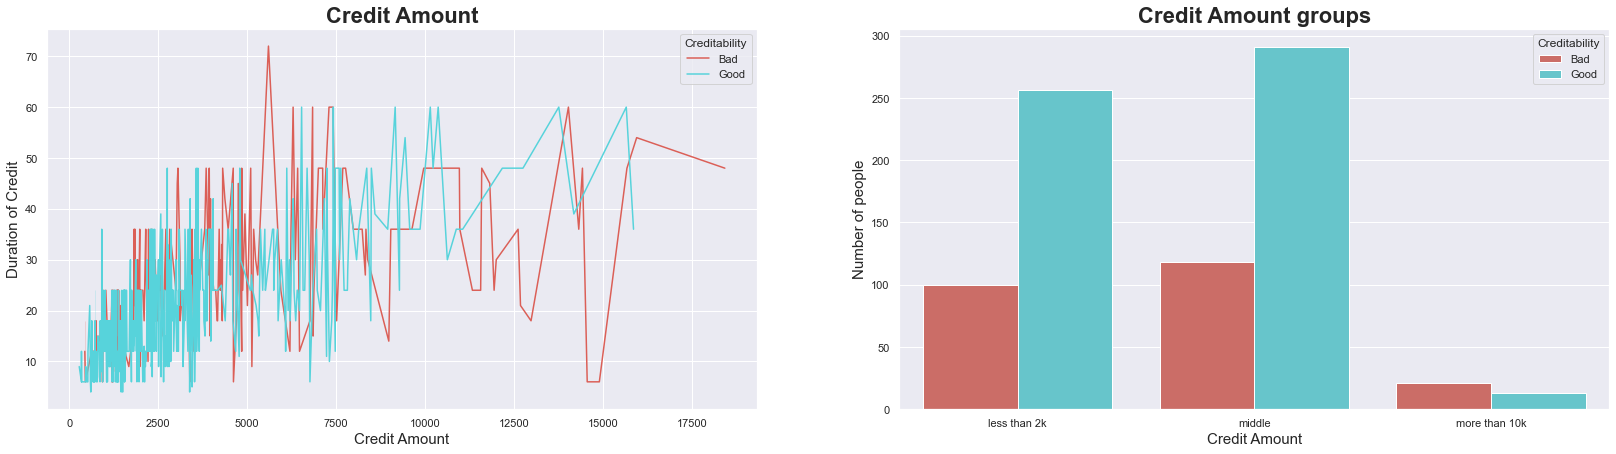

In [24]:
plt.figure(figsize=(28,7))
ax1 = plt.subplot(1, 2, 1)
bar = sns.lineplot(
    x="Credit Amount",
    y="Duration of Credit (month)",
    hue="Creditability",
palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax1
)
bar.set_title('Credit Amount',fontdict= { 'fontsize': 22, 'fontweight':'bold'})
bar.set_xlabel('Credit Amount', fontsize = 15)
bar.set_ylabel('Duration of Credit', fontsize = 15)
ax2 = plt.subplot(1, 2, 2)
bar2= sns.countplot(
    x="Credit Amount Group",
    hue="Creditability",
    palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax2
)
bar2.set_title('Credit Amount groups',fontdict= { 'fontsize': 22, 'fontweight':'bold'})
bar2.set_xlabel('Credit Amount', fontsize = 15)
bar2.set_ylabel('Number of people', fontsize = 15)
plt.savefig("picture2.png")

### Duration of Credit

Text(0, 0.5, 'Number of people')

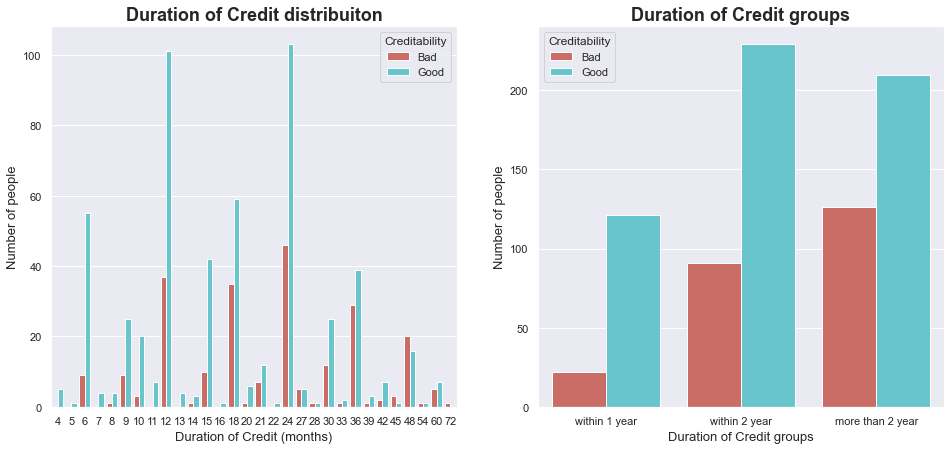

In [25]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
bar = sns.countplot(
    x="Duration of Credit (month)",
    hue="Creditability",
palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax1
)
bar.set_title('Duration of Credit distribuiton',fontdict= { 'fontsize': 18, 'fontweight':'bold'})
bar.set_xlabel('Duration of Credit (months)', fontsize = 13)
bar.set_ylabel('Number of people', fontsize = 13)
ax2 = plt.subplot(1, 2, 2)
bar2= sns.countplot(
    x="Duration of credit",
    hue="Creditability",
    palette=sns.color_palette("hls", 2),
    data=mytrain,
    ax=ax2
)
bar2.set_title('Duration of Credit groups',fontdict= { 'fontsize': 18, 'fontweight':'bold'})
bar2.set_xlabel('Duration of Credit groups', fontsize = 13)
bar2.set_ylabel('Number of people', fontsize = 13)

## Convert categorical data to dummy variables 

In [26]:
mytraindum=pd.get_dummies(mytrain, columns=['Account Balance','Purpose','Value Savings/Stocks','Payment Status of Previous Credit','Length of current employment','Instalment per cent','Sex','Marital Status','Duration in Current address','Most valuable available asset','Concurrent Credits','Type of apartment','Occupation','AgeGroup','Duration of credit','Credit Amount Group', 'No of Credits at this Bank','Creditability'])

In [27]:
mytraindum.head()

,ID,Duration of Credit (month),Credit Amount,Guarantors,Age (years),No of dependents,Telephone,Foreign Worker,Account Balance_Negative,Account Balance_no account,...,Duration of credit_within 1 year,Duration of credit_within 2 year,Duration of credit_more than 2 year,Credit Amount Group_less than 2k,Credit Amount Group_middle,Credit Amount Group_more than 10k,No of Credits at this Bank_1,No of Credits at this Bank_more than 1,Creditability_Bad,Creditability_Good
0,151,48,3051,0,54,0,0,1,1,0,...,0,0,1,0,1,0,1,0,1,0
1,152,21,571,0,65,0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
2,153,18,1345,0,26,0,0,1,1,0,...,0,1,0,1,0,0,1,0,1,0
3,154,15,806,0,22,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,1
4,155,4,1494,0,29,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1


## Drop string data for predictive models 

In [28]:
# split train and test data

k = mytraindum.drop(['ID','Age (years)','Duration of Credit (month)','Credit Amount','Creditability_Bad','Creditability_Good'],axis=1)
j= mytraindum['Creditability_Good']

## Recursive Feature Elimination
### Selecting the variables for the model based on ranking    

In [29]:
#using RFE to select important feature for logistic regression
#select 15 variables for the model

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
model = LogisticRegression(solver='liblinear')
rfe.fit(k, j)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [30]:
print(rfe.support_)

# those variables above are selected based on RFE

[False False False  True False  True False False False False  True False
  True False False  True False  True False  True  True False False  True
 False False False  True False False False False False False False False
 False False False  True False False  True False False False False False
 False False  True False False False False False False False  True False
 False False False  True False False]


In [31]:
print(rfe.ranking_)
# 'Foreign Worker','Account Balance_no account','Purpose_education','Purpose_new car','Value Savings/Stocks_none','Value Savings/Stocks_rich','Payment Status of Previous Credit_no history','Type of apartment_rent','Duration of credit_within 1 year','Credit Amount Group_more than 10k'
#increase 'Purpose_used car','Payment Status of Previous Credit_other bank','Payment Status of Previous Credit_other bank','Most valuable available asset_none','Credit Amount Group_middle'

[15 20 12  1  3  1  4 18 44 17  1 36  1 38 49  1 24  1  5  1  1 16 45  1
  2 25 10  1 52 32 46 47 29 31 28 30 40 14 48  1 50 43  1  8 42 26 39 51
 22 23  1 35 33  9 34 19 21 41  1 37  6 11  7  1 27 13]


In [32]:
print(k.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 66 columns):
 #   Column                                                                          Non-Null Count  Dtype
---  ------                                                                          --------------  -----
 0   Guarantors                                                                      800 non-null    int64
 1   No of dependents                                                                800 non-null    int64
 2   Telephone                                                                       800 non-null    int64
 3   Foreign Worker                                                                  800 non-null    int64
 4   Account Balance_Negative                                                        800 non-null    uint8
 5   Account Balance_no account                                                      800 non-null    uint8
 6   Account Balance_poor              

In [33]:
# put those selected variables together 
cols= ['Foreign Worker','Account Balance_no account','Account Balance_Negative','Purpose_education','Purpose_new car','Value Savings/Stocks_none','Value Savings/Stocks_poor','Value Savings/Stocks_rich','Payment Status of Previous Credit_no credits taken/ all credits paid back duly','Type of apartment_rent','Duration of credit_within 1 year','Credit Amount Group_more than 10k','Purpose_used car','Payment Status of Previous Credit_other bank','Duration in Current address_less than 1 year','Length of current employment_less than 1  year','Type of apartment_own']

X= mytraindum[cols]
y=mytraindum['Creditability_Good']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=0
)


## Logistic regression

In [34]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())
# based on different experiment, altought some variables don't have significant p-value, but they'd affect
# model accuracy such as foreign workers, value saving/ poor

Optimization terminated successfully.
         Current function value: 31.756892
         Iterations 7
                                                        Results: Logit
Model:                                   Logit                                 Pseudo R-squared:                    inf       
Dependent Variable:                      Creditability_Good                    AIC:                                 30520.6160
Date:                                    2022-02-15 14:18                      BIC:                                 30591.5704
No. Observations:                        480                                   Log-Likelihood:                      -15243.   
Df Model:                                16                                    LL-Null:                             0.0000    
Df Residuals:                            463                                   LLR p-value:                         1.0000    
Converged:                               1.0000                 

C:\Users\Alice\anaconda3\envs\Data\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Alice\anaconda3\envs\Data\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Alice\anaconda3\envs\Data\lib\site-packages\statsmodels\discrete\discrete_model.py:3500: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [35]:

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


### Got 82% F1 score in regression model

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.48      0.53        97
           1       0.79      0.85      0.82       223

    accuracy                           0.74       320
   macro avg       0.69      0.67      0.68       320
weighted avg       0.73      0.74      0.73       320



## Cross validation for logistic regression
#### To estimate different size data accuracy

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.75       0.8125     0.77083333 0.77083333 0.72916667 0.77083333
 0.75       0.70833333 0.75       0.70833333]


### The average accuracy is 75% and the max is 81%

In [39]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7083333333333334, 0.7520833333333333, 0.8125)

## Experiments with ensemble learning
#### didn't work well. the higgest one on kaggle is 90% 

In [40]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# create pipeline
rfe2 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model2 = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])


In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model3 = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model3.fit(X_train, y_train)
model3.score(X_test,y_test)

0.703125

In [42]:
from sklearn.ensemble import AdaBoostClassifier
model6 = AdaBoostClassifier(random_state=1)
model6.fit(X_train, y_train)
model6.score(X_test,y_test)

0.74375

In [43]:
from sklearn.metrics import f1_score
i = model6.predict(X_test)
f1_score(i,y_test)

0.8193832599118943

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
model7= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model7.fit(X_train, y_train)
model7.score(X_test,y_test)

0.7125

## Random forest

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [48]:
#random forest 
clf=RandomForestClassifier(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,                                         max_features = "auto", min_samples_leaf = 60)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("F1 score:",f1_score(y_test, y_pred))


F1 score: 0.8213627992633519


## Correlation of variables in predictive model

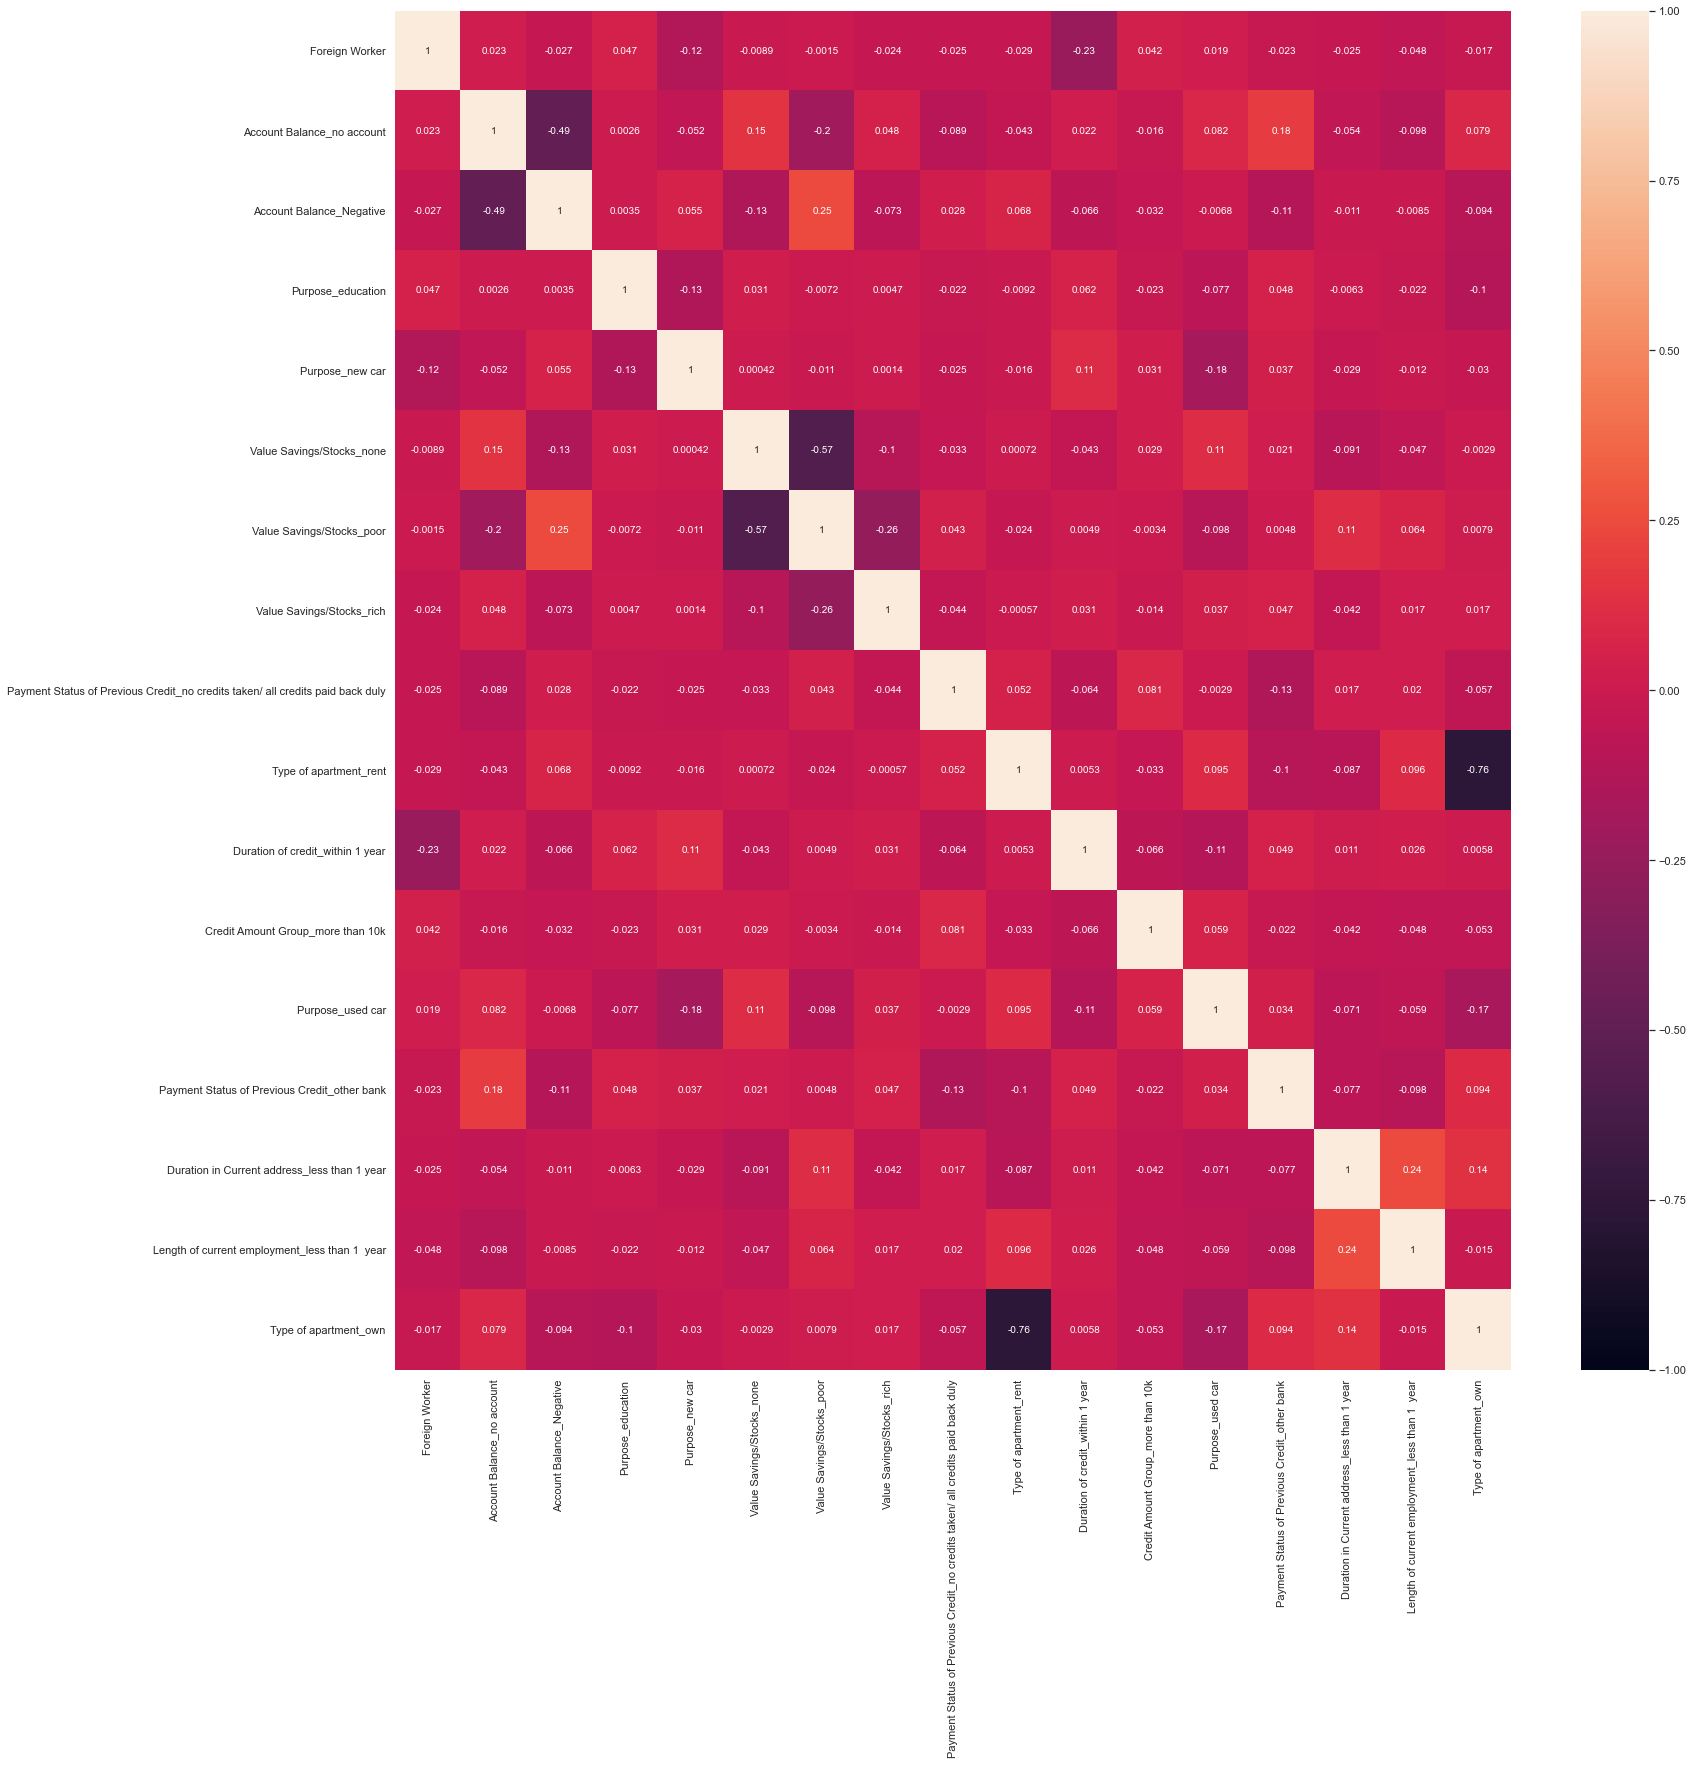

In [49]:
X1= mytraindum[cols]
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(X1.corr(), vmin=-1, vmax=1, annot=True)

## Principal Component Analysis (PCA)
### I did PCA in R and imported the data from it 
### Based the PCA, I chose 26 PC (75% cumulative variance) for 3 & 4 clusters 

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
mytraindum_scaled = StandardScaler().fit_transform(mytraindum)

In [52]:
features = mytraindum_scaled.T
cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([5.69599584+0.j, 4.46126136+0.j, 3.43632698+0.j, 3.034992  +0.j,
       2.81428033+0.j])

In [53]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 

## Clustering analysis

In [54]:
import sys
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA


In [55]:
from sklearn.cluster import KMeans

In [56]:
kmeans3 = KMeans(n_clusters=3)
mytraindum['kmeans3'] = kmeans3.fit_predict(mytraindum)

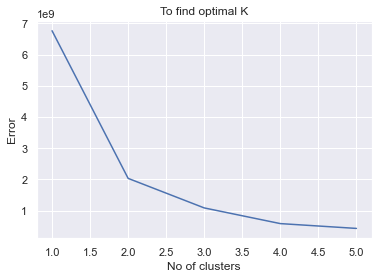

In [57]:
Error =[]
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i).fit(mytraindum)
    kmeans.fit(mytraindum)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 6), Error)
plt.title('To find optimal K')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()